Import necessary libraries and load matches dataset

In [447]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

matches = pd.read_csv('Datasets/international_matches.csv')

Describe the dataset

In [448]:
# EDA
print(matches.describe())
print('----------------------------------------')

# Observing total number of rows and columns in the dataset
print(matches.head())
print(matches.tail())
print(matches.shape)  # (23921, 25)
print('----------------------------------------')

# Observing all the columns in the dataset
print(list(matches))
print('----------------------------------------')

       home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
count         23921.000000         23921.000000                 23921.000000   
mean             77.854688            80.797375                   323.401488   
std              52.355225            53.232902                   500.825725   
min               1.000000             1.000000                     0.000000   
25%              33.000000            36.000000                     0.000000   
50%              71.000000            73.000000                     0.000000   
75%             115.000000           119.000000                   547.000000   
max             211.000000           211.000000                  2164.000000   

       away_team_total_fifa_points  home_team_score  away_team_score  \
count                 23921.000000     23921.000000     23921.000000   
mean                    315.453576         1.609214         1.068266   
std                     490.944273         1.630127         1.2

Remove missing values

In [449]:
# Finding Missing Values
print(matches.isnull().sum())
print('----------------------------------------')

# Drop all rows with missing values
matches = matches.dropna()
print(matches.shape)  # (4303, 25)

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64
------------

Find out how many matches each continent wins in contrast to their total matches played

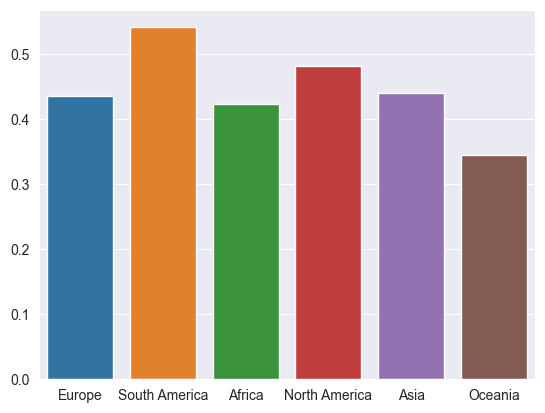

In [450]:
continent_rows = matches["home_team_continent"]
continent_match_count = continent_rows.value_counts()

# find how many games each continent won
continent_wins = matches[matches["home_team_result"] == "Win"]
continent_wins = continent_wins["home_team_continent"].value_counts()

# plot the number of wins for each continent divided by the number of games played
continent_wins = continent_wins / continent_match_count
sns.barplot(x=continent_wins.index, y=continent_wins.values)
plt.show()

Study which countries have the best offense, defense, midfield and goalkeeper scores

In [451]:
offense = matches.groupby("home_team")["home_team_mean_offense_score"].mean().sort_values(ascending=False)
midfield = matches.groupby("home_team")["home_team_mean_midfield_score"].mean().sort_values(ascending=False)
defense = matches.groupby("home_team")["home_team_mean_defense_score"].mean().sort_values(ascending=False)
goalkeeper = matches.groupby("home_team")["home_team_goalkeeper_score"].mean().sort_values(ascending=False)

# find the mean of all categories
overall = ((offense + midfield + defense + goalkeeper) / 4).sort_values(ascending=False)

# make a table with 5 rows and a column for each category
table = pd.DataFrame(index=range(1, 6), columns=["offense", "midfield", "defense", "goalkeeper", "overall"])

# fill the table with the mean values for each category
table["offense"] = offense.index[:5]
table["midfield"] = midfield.index[:5]
table["defense"] = defense.index[:5]
table["goalkeeper"] = goalkeeper.index[:5]
table["overall"] = overall.index[:5]

table

,offense,midfield,defense,goalkeeper,overall
1,Argentina,Spain,Brazil,Germany,Spain
2,Brazil,France,Spain,Spain,Germany
3,Spain,Germany,Italy,Italy,Brazil
4,France,Brazil,Germany,France,France
5,Netherlands,England,England,Brazil,Italy


Import sklearn libraries

In [452]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.model_selection import GridSearchCV


Give ids to string data

In [453]:
team_name = {}
index = 0
for idx, row in matches.iterrows():
    name = row['home_team']
    if name not in team_name.keys():
        team_name[name] = index
        index += 1

    name = row['away_team']
    if name not in team_name.keys():
        team_name[name] = index
        index += 1
team_name

{'Spain': 0,
 'Scotland': 1,
 'Austria': 2,
 'England': 3,
 'Croatia': 4,
 'Hungary': 5,
 'Iceland': 6,
 'Bulgaria': 7,
 'Italy': 8,
 'Norway': 9,
 'Morocco': 10,
 'Tunisia': 11,
 'Northern Ireland': 12,
 'Poland': 13,
 'Russia': 14,
 'Slovakia': 15,
 'Bosnia and Herzegovina': 16,
 'Costa Rica': 17,
 'Canada': 18,
 'Germany': 19,
 'Brazil': 20,
 'Greece': 21,
 'Turkey': 22,
 'Netherlands': 23,
 'Czech Republic': 24,
 'Slovenia': 25,
 'Sweden': 26,
 'Switzerland': 27,
 'Republic of Ireland': 28,
 'Wales': 29,
 'Argentina': 30,
 'Uruguay': 31,
 'Colombia': 32,
 'Paraguay': 33,
 'Romania': 34,
 'France': 35,
 'Belgium': 36,
 'Denmark': 37,
 'Finland': 38,
 'Portugal': 39,
 'Australia': 40,
 'Cameroon': 41,
 'South Africa': 42,
 'Nigeria': 43,
 'USA': 44,
 'Jamaica': 45,
 'Korea Republic': 46,
 'Mexico': 47,
 'Senegal': 48,
 'China PR': 49,
 "Côte d'Ivoire": 50,
 'North Macedonia': 51,
 'Serbia': 52,
 'Ukraine': 53,
 'Ghana': 54,
 'Ecuador': 55,
 'Chile': 56,
 'Peru': 57,
 'Trinidad and To

In [454]:
tournament_names = {}
index = 0
for idx, row in matches.iterrows():
    name = row['tournament']
    if name not in tournament_names.keys():
        tournament_names[name] = index
        index += 1

    name = row['tournament']
    if name not in tournament_names.keys():
        tournament_names[name] = index
        index += 1

tournament_names

{'Friendly': 0,
 'FIFA World Cup qualification': 1,
 "King's Cup": 2,
 'Confederations Cup': 3,
 'Gold Cup': 4,
 'EAFF Championship': 5,
 'African Cup of Nations': 6,
 'Lunar New Year Cup': 7,
 'Cyprus International Tournament': 8,
 'Kirin Cup': 9,
 'FIFA World Cup': 10,
 'UEFA Euro qualification': 11,
 'Copa América': 12,
 'UEFA Euro': 13,
 'African Cup of Nations qualification': 14,
 'AFC Asian Cup': 15,
 'Nations Cup': 16,
 'Copa Confraternidad': 17,
 'Superclásico de las Américas': 18,
 'Copa del Pacífico': 19,
 'Nehru Cup': 20,
 'Kirin Challenge Cup': 21,
 'African Nations Championship': 22,
 'OSN Cup': 23,
 'Intercontinental Cup': 24,
 'UEFA Nations League': 25,
 'African Nations Championship qualification': 26,
 'CONCACAF Nations League': 27,
 'COSAFA Cup': 28,
 'Arab Cup': 29,
 'CONMEBOL–UEFA Cup of Champions': 30}

Add Winner column

In [455]:
# Winner of particular match
# For Home team win value is 1, Away team win value is 2 and for Draw value is 0
matches['Winner'] = '-'

def match_winner(df):
    if int(df['home_team_score']) == int(df['away_team_score']):
        df['Winner'] = 0
    elif int(df['home_team_score']) > int(df['away_team_score']):
        df['Winner'] = 1
    else:
        df['Winner'] = 2

    return df

matches = matches.apply(match_winner, axis = 1)

Drop irrelevant columns

In [456]:
matches = matches.drop(columns = ['home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_continent', 'away_team_continent', 'country', 'city', 'shoot_out', 'home_team_result', 'home_team_score', 'away_team_score'])

Replace strings with ids

In [457]:
# Replace Team names by corresponding id:
def replace_name(df):
    df['home_team'] = team_name[df['home_team']]
    df['away_team'] = team_name[df['away_team']]

    return df

matches = matches.apply(replace_name, axis = 1)

In [458]:
# Replace Tournament names by corresponding id:
def replace_tournament_name(df):
    df['tournament'] = tournament_names[df['tournament']]

    return df

matches = matches.apply(replace_tournament_name, axis = 1)

In [459]:
# replace date with epoch
matches['date'] = pd.to_datetime(matches['date'])
matches['date'] = matches['date'].astype(np.int64) // 10 ** 9

Prepare data for training and testing

In [460]:
X = matches.iloc[:, :-1].values
y = matches.iloc[:, -1].values


X = np.array(X, dtype = 'f')
y = np.array(y, dtype = 'f')


from sklearn.preprocessing import LabelEncoder
LabelEncoder_res=LabelEncoder()
y=LabelEncoder_res.fit_transform(y)

X, y = shuffle(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Scaling of Data:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


Import keras libraries

In [461]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

#seed
np.random.seed(69)

## Method 1: Logistic Regression

In [462]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
LR = LogisticRegression(random_state = 69, max_iter=1000)
parameters = {'penalty': ['l2'], 'C' : [ 0.1, 1, 10], 'multi_class' :['multinomial'], 'solver': ['lbfgs', 'newton-cg', 'saga']}
LR = GridSearchCV(LR, param_grid= parameters ,cv=5)
LR.fit(X_train, y_train)
score_train_acc = LR.score(X_train, y_train)
score_test_acc = LR.score(X_test, y_test)
print(score_train_acc) # 0.53
print(score_test_acc) # 0.54
y_pred_LR = LR.predict(X_test)
print(classification_report(y_test, y_pred_LR))
print(confusion_matrix(y_test, y_pred_LR, labels=range(3)))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search 

0.5379609544468547
0.525092936802974
              precision    recall  f1-score   support

           0       0.36      0.01      0.03       278
           1       0.55      0.81      0.65       484
           2       0.48      0.54      0.51       314

    accuracy                           0.53      1076
   macro avg       0.46      0.45      0.40      1076
weighted avg       0.48      0.53      0.45      1076

[[  4 180  94]
 [  4 390  90]
 [  3 140 171]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search 

## Method 2: SGDC Classifier

In [463]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(loss = 'log_loss', penalty = 'elasticnet')
SGD.fit(X_train, y_train)
score_train_acc = SGD.score(X_train, y_train)
score_test_acc = SGD.score(X_test, y_test)
print(score_train_acc) # 50
print(score_test_acc)  # 50
y_pred_SGD = SGD.predict(X_test)
print(classification_report(y_test, y_pred_SGD))
print(confusion_matrix(y_test, y_pred_SGD, labels=range(3)))

0.5289742795165788
0.5269516728624535
              precision    recall  f1-score   support

           0       0.32      0.08      0.13       278
           1       0.56      0.79      0.66       484
           2       0.49      0.52      0.50       314

    accuracy                           0.53      1076
   macro avg       0.46      0.46      0.43      1076
weighted avg       0.48      0.53      0.48      1076

[[ 22 168  88]
 [ 23 383  78]
 [ 23 129 162]]


## Method 3: SVM

In [464]:
from sklearn.svm import SVC
svm_model = SVC()
parameters = {'C' : [ 0.1, 0.001, 1]}
svm_model = GridSearchCV(svm_model, param_grid= parameters ,cv=5)
svm_model.fit(X_train, y_train)
score_train_acc = svm_model.score(X_train, y_train)
score_test_acc = svm_model.score(X_test, y_test)
print(score_train_acc) # 57
print(score_test_acc)  # 53
y_pred_SVM = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_SVM))
print(confusion_matrix(y_test, y_pred_SVM, labels=range(3)))

0.5370312984195847
0.5232342007434945
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       278
           1       0.53      0.85      0.65       484
           2       0.50      0.49      0.49       314

    accuracy                           0.52      1076
   macro avg       0.34      0.44      0.38      1076
weighted avg       0.39      0.52      0.44      1076

[[  0 200  78]
 [  0 410  74]
 [  0 161 153]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Method 4: Decision Tree

In [465]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
score_train_acc = dc.score(X_train, y_train)
score_test_acc = dc.score(X_test, y_test)
print(score_train_acc) # 100
print(score_test_acc)  # 42
y_pred_dc = dc.predict(X_test)
print(classification_report(y_test, y_pred_dc))
print(confusion_matrix(y_test, y_pred_dc, labels=range(3)))

1.0
0.4200743494423792
              precision    recall  f1-score   support

           0       0.28      0.31      0.30       278
           1       0.54      0.50      0.52       484
           2       0.39      0.39      0.39       314

    accuracy                           0.42      1076
   macro avg       0.40      0.40      0.40      1076
weighted avg       0.43      0.42      0.42      1076

[[ 87 106  85]
 [133 241 110]
 [ 88 102 124]]


## Method 5: KNN

In [466]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights = 'uniform', algorithm='auto')
knn.fit(X_train, y_train)
score_train_acc = knn.score(X_train, y_train)
score_test_acc = knn.score(X_test, y_test)
print(score_train_acc) # 63
print(score_test_acc)  # 44
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn, labels=range(3)))

0.624109079640533
0.4395910780669145
              precision    recall  f1-score   support

           0       0.27      0.32      0.29       278
           1       0.55      0.60      0.57       484
           2       0.44      0.30      0.36       314

    accuracy                           0.44      1076
   macro avg       0.42      0.41      0.41      1076
weighted avg       0.44      0.44      0.44      1076

[[ 90 127  61]
 [135 289  60]
 [110 110  94]]


## Method 6: Naive Bayes

In [467]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
score_train_acc = nb.score(X_train, y_train)
score_test_acc = nb.score(X_test, y_test)
print(score_train_acc) # 52
print(score_test_acc)  # 51
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb, labels=range(3)))

0.5181282925317633
0.5130111524163569
              precision    recall  f1-score   support

           0       0.35      0.09      0.14       278
           1       0.58      0.68      0.63       484
           2       0.45      0.63      0.53       314

    accuracy                           0.51      1076
   macro avg       0.46      0.47      0.43      1076
weighted avg       0.48      0.51      0.47      1076

[[ 25 139 114]
 [ 29 328 127]
 [ 18  97 199]]


## Method 7: Random Forest

In [468]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators=100)
rc.fit(X_train, y_train)
score_train_acc = rc.score(X_train, y_train)
score_test_acc = rc.score(X_test, y_test)
print(score_train_acc) # 1
print(score_test_acc)  # 0.52
y_pred_rc = rc.predict(X_test)
print(classification_report(y_test, y_pred_rc))
print(confusion_matrix(y_test, y_pred_rc, labels=range(3)))

1.0
0.4972118959107807
              precision    recall  f1-score   support

           0       0.26      0.12      0.16       278
           1       0.56      0.73      0.63       484
           2       0.47      0.48      0.48       314

    accuracy                           0.50      1076
   macro avg       0.43      0.44      0.42      1076
weighted avg       0.46      0.50      0.46      1076

[[ 32 161  85]
 [ 49 351  84]
 [ 42 120 152]]


## Method 8: Bagging Classifier

In [469]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=100)
bc.fit(X_train, y_train)
score_train_acc = bc.score(X_train, y_train)
score_test_acc = bc.score(X_test, y_test)
print(score_train_acc) # 1
print(score_test_acc)  # 50
y_pred_bc = bc.predict(X_test)
print(classification_report(y_test, y_pred_bc))
print(confusion_matrix(y_test, y_pred_bc, labels=range(3)))

1.0
0.483271375464684
              precision    recall  f1-score   support

           0       0.24      0.14      0.18       278
           1       0.55      0.70      0.62       484
           2       0.47      0.45      0.46       314

    accuracy                           0.48      1076
   macro avg       0.42      0.43      0.42      1076
weighted avg       0.45      0.48      0.46      1076

[[ 38 161  79]
 [ 64 340  80]
 [ 54 118 142]]


## Method 9: Gradient Boosting

In [470]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
score_train_acc = gbc.score(X_train, y_train)
score_test_acc = gbc.score(X_test, y_test)
print(score_train_acc) # 63
print(score_test_acc)  # 53
y_pred_gbc = gbc.predict(X_test)
print(classification_report(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc, labels=range(3)))

0.6526185311434769
0.5130111524163569
              precision    recall  f1-score   support

           0       0.31      0.10      0.15       278
           1       0.56      0.76      0.64       484
           2       0.48      0.50      0.49       314

    accuracy                           0.51      1076
   macro avg       0.45      0.45      0.43      1076
weighted avg       0.47      0.51      0.47      1076

[[ 28 163  87]
 [ 32 368  84]
 [ 31 127 156]]


## Method 10: XGBoost

In [472]:
import xgboost as xgb
XGB = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=1,
       n_estimators=40, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=1e-05, reg_lambda=1,
       seed=2, subsample=0.8)
XGB.fit(X_train, y_train)
score_train_acc = XGB.score(X_train, y_train)
score_test_acc = XGB.score(X_test, y_test)
print(score_train_acc) # 55
print(score_test_acc)  # 51
y_pred_XGB = XGB.predict(X_test)
print(classification_report(y_test, y_pred_XGB))
print(confusion_matrix(y_test, y_pred_XGB, labels=range(3)))

0.5469476293771305
0.5130111524163569
              precision    recall  f1-score   support

           0       0.14      0.00      0.01       278
           1       0.53      0.83      0.65       484
           2       0.48      0.48      0.48       314

    accuracy                           0.51      1076
   macro avg       0.38      0.44      0.38      1076
weighted avg       0.42      0.51      0.43      1076

[[  1 191  86]
 [  4 400  80]
 [  2 161 151]]
[19:03:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:03:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:03:51] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "sca